In [62]:
import pandas as pd
import matplotlib as plt

from urllib.request import urlopen
from tempfile import TemporaryFile
from zipfile import ZipFile

import operator


%matplotlib inline
plt.rc('figure', figsize=(15.0, 15.0))

with urlopen('http://www.electoralcommission.org.uk/__data/assets/file/0004/191650/2015-UK-general-election-data-results-WEB.zip') as response:
    with TemporaryFile() as local:
        local.write(response.read())
        local.seek(0)
        with ZipFile(local, 'r') as archive:
            with archive.open('RESULTS.csv', 'r') as results_file:
                results_2015 = pd.read_csv(results_file, encoding='latin_1')

In [63]:
df = results_2015[['Constituency Name', 'Party abbreviation', 'Votes']]
df = df[df['Party abbreviation'].isin(['Con','Lab','LD','SNP','UKIP','Green','PC'])]
con_lab = df.pivot(index='Constituency Name', columns='Party abbreviation', values='Votes')
con_lab['Winner'] = con_lab.idxmax(axis=1)
con_lab

Party abbreviation,Con,Green,LD,Lab,PC,SNP,UKIP,Winner
Constituency Name,,,,,,,,
Aberavon,3742.0,711.0,1397.0,15416.0,3663.0,NaN,4971.0,Lab
Aberconwy,12513.0,727.0,1391.0,8514.0,3536.0,NaN,3467.0,Con
Aberdeen North,5304.0,NaN,2050.0,11397.0,NaN,24793.0,NaN,SNP
Aberdeen South,11087.0,964.0,2252.0,12991.0,NaN,20221.0,897.0,SNP
Airdrie and Shotts,3389.0,NaN,678.0,15108.0,NaN,23887.0,1088.0,SNP
Aldershot,23369.0,2025.0,4076.0,8468.0,NaN,NaN,8253.0,Con
Aldridge-Brownhills,20558.0,826.0,1330.0,8835.0,NaN,NaN,7751.0,Con
Altrincham and Sale West,26771.0,1983.0,4235.0,13481.0,NaN,NaN,4047.0,Con
Alyn and Deeside,13197.0,976.0,1733.0,16540.0,1608.0,NaN,7260.0,Lab


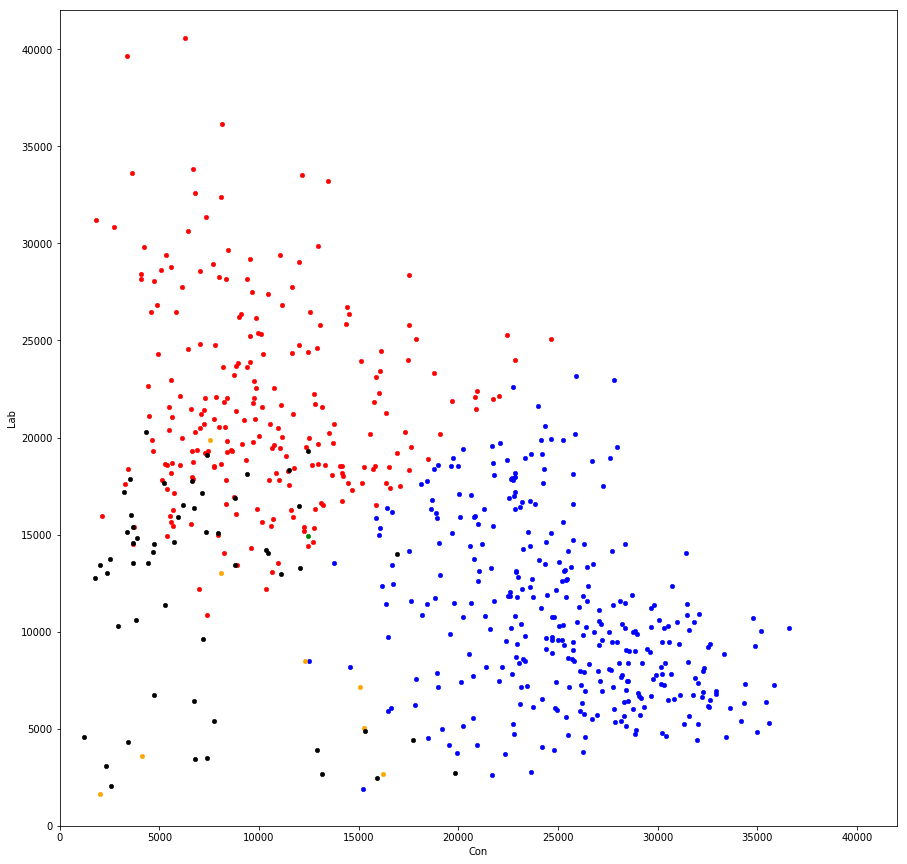

In [66]:
axes1 = con_lab.loc[con_lab['Winner'] == 'Con'].plot(kind='scatter', x='Con', y='Lab', xlim=(0, 42000), ylim=(0,42000), color='blue', lw=0.5)#, edgecolor='Black')
con_lab.loc[con_lab['Winner'] == 'Lab'].plot(kind='scatter', x='Con', y='Lab', xlim=(0, 42000), ylim=(0,42000), color='red', ax=axes1, lw=0.5)#, edgecolor='Black')
con_lab.loc[con_lab['Winner'] == 'LD'].plot(kind='scatter', x='Con', y='Lab', xlim=(0, 42000), ylim=(0,42000), color='orange', ax=axes1, lw=0.5)#, edgecolor='Black')
con_lab.loc[con_lab['Winner'] == 'SNP'].plot(kind='scatter', x='Con', y='Lab', xlim=(0, 42000), ylim=(0,42000), color='black', ax=axes1, lw=0.5)#, edgecolor='Black')
con_lab.loc[con_lab['Winner'] == 'Green'].plot(kind='scatter', x='Con', y='Lab', xlim=(0, 42000), ylim=(0,42000), color='green', ax=axes1, lw=0.5)#, edgecolor='Black')